In [2]:
### LOAD LIBRARIES ###
library(dplyr)
library(tidyr)
library(ggplot2)
library(pheatmap)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
data <- read.csv("datasets/1976-2020_us_presidential.csv", stringsAsFactors = FALSE)
head(data, 20)

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
,<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<lgl>,<int>,<int>,<int>,<lgl>,<chr>
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,FALSE,659170,1182850,20210113,NA,DEMOCRAT
2,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,FALSE,504070,1182850,20210113,NA,REPUBLICAN
3,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,FALSE,9198,1182850,20210113,NA,OTHER
4,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,FALSE,6669,1182850,20210113,NA,OTHER
5,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"HALL, GUS",COMMUNIST PARTY USE,FALSE,1954,1182850,20210113,NA,OTHER
6,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MACBRIDE, ROGER",LIBERTARIAN,FALSE,1481,1182850,20210113,NA,LIBERTARIAN
7,1976,ALABAMA,AL,1,63,41,US PRESIDENT,,,TRUE,308,1182850,20210113,NA,OTHER
8,1976,ALASKA,AK,2,94,81,US PRESIDENT,"FORD, GERALD",REPUBLICAN,FALSE,71555,123574,20210113,NA,REPUBLICAN
9,1976,ALASKA,AK,2,94,81,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,FALSE,44058,123574,20210113,NA,DEMOCRAT


In [4]:
processed_data <- data %>%
  filter(!party_simplified %in% c("DEMOCRAT", "REPUBLICAN")) %>%
  group_by(year, state) %>%
  summarise(
    candidate = "OTHER",
    party_simplified = "OTHER",
    candidatevotes = sum(candidatevotes, na.rm = TRUE),  
    totalvotes = unique(totalvotes)  
  ) %>%

  bind_rows(data %>% filter(party_simplified %in% c("DEMOCRAT", "REPUBLICAN"))) %>%
  arrange(year, state, factor(party_simplified, levels = c("DEMOCRAT", "REPUBLICAN", "OTHER")))


head(processed_data, 20)

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


year,state,candidate,party_simplified,candidatevotes,totalvotes,state_po,state_fips,state_cen,state_ic,office,party_detailed,writein,version,notes
<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<lgl>,<int>,<lgl>
1976,ALABAMA,"CARTER, JIMMY",DEMOCRAT,659170,1182850,AL,1,63,41,US PRESIDENT,DEMOCRAT,FALSE,20210113,NA
1976,ALABAMA,"FORD, GERALD",REPUBLICAN,504070,1182850,AL,1,63,41,US PRESIDENT,REPUBLICAN,FALSE,20210113,NA
1976,ALABAMA,OTHER,OTHER,19610,1182850,NA,NA,NA,NA,NA,NA,NA,NA,NA
1976,ALASKA,"CARTER, JIMMY",DEMOCRAT,44058,123574,AK,2,94,81,US PRESIDENT,DEMOCRAT,FALSE,20210113,NA
1976,ALASKA,"FORD, GERALD",REPUBLICAN,71555,123574,AK,2,94,81,US PRESIDENT,REPUBLICAN,FALSE,20210113,NA
1976,ALASKA,OTHER,OTHER,7961,123574,NA,NA,NA,NA,NA,NA,NA,NA,NA
1976,ARIZONA,"CARTER, JIMMY",DEMOCRAT,295602,742719,AZ,4,86,61,US PRESIDENT,DEMOCRAT,FALSE,20210113,NA
1976,ARIZONA,"FORD, GERALD",REPUBLICAN,418642,742719,AZ,4,86,61,US PRESIDENT,REPUBLICAN,FALSE,20210113,NA
1976,ARIZONA,OTHER,OTHER,28475,742719,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [5]:
election_results <- processed_data %>%
  group_by(year, state) %>%
  summarise(
    total_votes = unique(totalvotes), 
    percentage_votes_republican = sum(candidatevotes[party_simplified == "REPUBLICAN"], na.rm = TRUE) / total_votes,
    percentage_votes_democrats = sum(candidatevotes[party_simplified == "DEMOCRAT"], na.rm = TRUE) / total_votes,
    percentage_votes_third = sum(candidatevotes[party_simplified == "OTHER"], na.rm = TRUE) / total_votes,
    adjusted_percentage_votes_republican = percentage_votes_republican / 
      (percentage_votes_republican + percentage_votes_democrats),
    adjusted_percentage_votes_democrats = percentage_votes_democrats / 
      (percentage_votes_republican + percentage_votes_democrats)
  ) %>%
  ungroup() %>%
  rename(
    election_year = year,
    percentage_votes_democracts = percentage_votes_democrats
  )

head(election_results, 10)

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


election_year,state,total_votes,percentage_votes_republican,percentage_votes_democracts,percentage_votes_third,adjusted_percentage_votes_republican,adjusted_percentage_votes_democrats
<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1976,ALABAMA,1182850,0.4261487,0.5572727,0.016578603,0.4333328,0.5666672
1976,ALASKA,123574,0.5790458,0.3565313,0.064422937,0.6189183,0.3810817
1976,ARIZONA,742719,0.5636614,0.3979998,0.038338860,0.5861330,0.4138670
1976,ARKANSAS,767535,0.3490434,0.6496173,0.001339353,0.3495115,0.6504885
1976,CALIFORNIA,7803770,0.4974831,0.4795482,0.022968642,0.5091783,0.4908217
1976,COLORADO,1081440,0.5402778,0.4260995,0.033622762,0.5590754,0.4409246
1976,CONNECTICUT,1386355,0.5188144,0.4673370,0.013848545,0.5261002,0.4738998
1976,DELAWARE,235642,0.4658762,0.5196909,0.014432911,0.4726986,0.5273014
1976,DISTRICT OF COLUMBIA,168830,0.1650951,0.8163123,0.018592667,0.1682228,0.8317772


In [6]:
write.csv(election_results, file = "election_results.csv", row.names = FALSE)

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


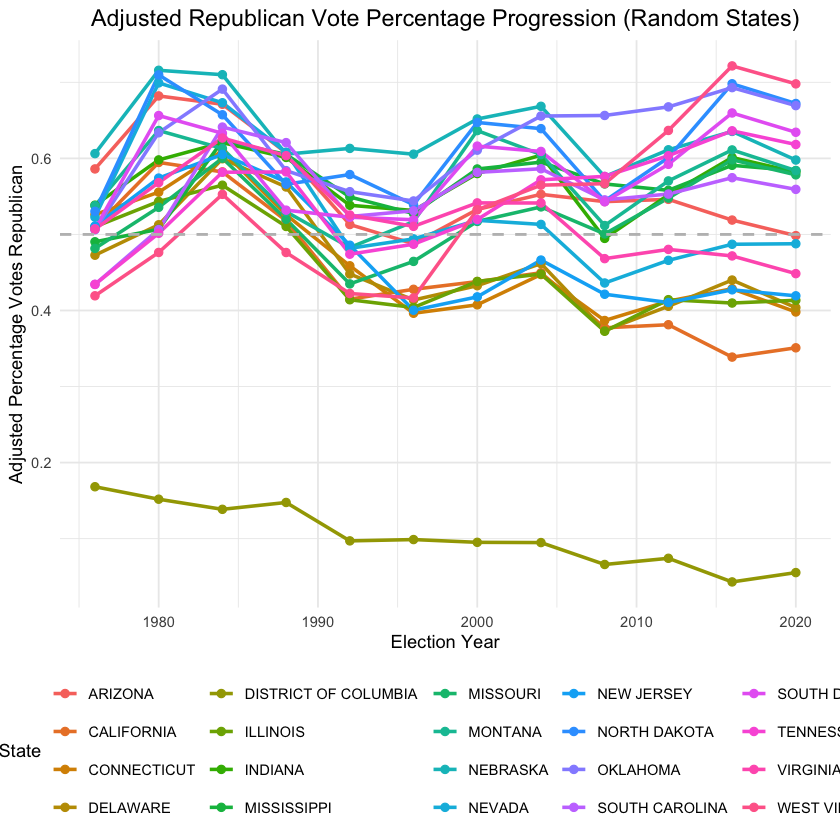

In [7]:
set.seed(123)  # For reproducibility
random_states <- sample(unique(election_results$state), 20)

selected_data <- election_results %>%
  filter(state %in% random_states)

ggplot(selected_data, aes(x = election_year, y = adjusted_percentage_votes_republican, color = state, group = state)) +
  geom_line(size = 1) +
  geom_point(size = 2) +
  geom_hline(yintercept = 0.5, linetype = "dashed", color = "gray", size = 0.8) +  # Add horizontal line at 0.5
  labs(
    title = "Adjusted Republican Vote Percentage Progression (Random States)",
    x = "Election Year",
    y = "Adjusted Percentage Votes Republican",
    color = "State"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 14),
    legend.position = "bottom"
  )

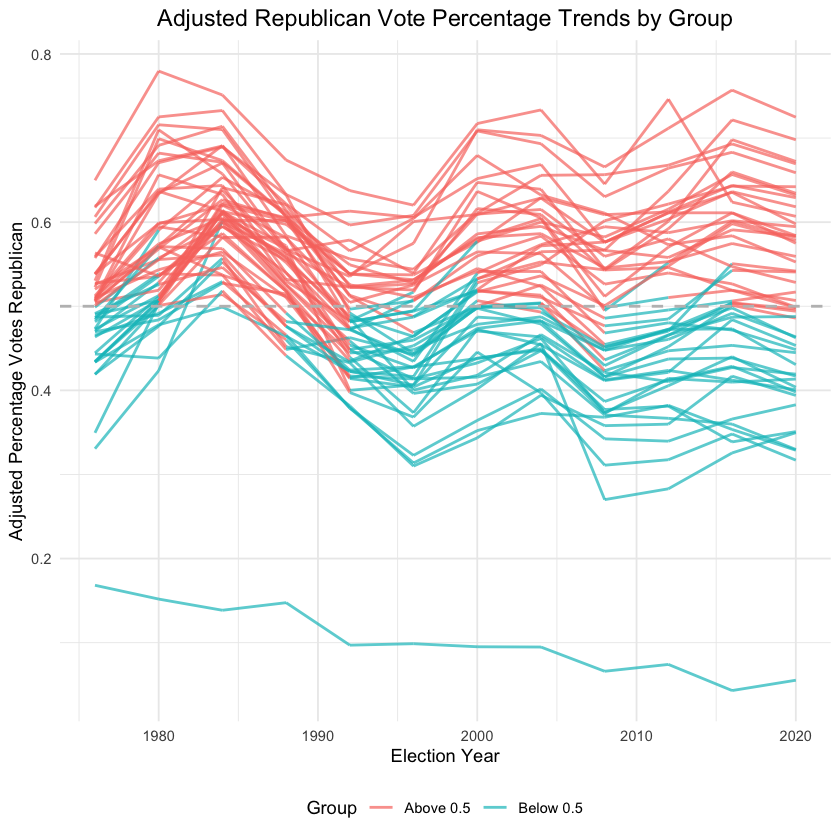

In [8]:
election_results_2 <- election_results %>%
  mutate(group = ifelse(adjusted_percentage_votes_republican >= 0.5, "Above 0.5", "Below 0.5"))


ggplot(election_results_2, aes(x = election_year, y = adjusted_percentage_votes_republican, group = state, color = group)) +
  geom_line(alpha = 0.7, size = 0.8) +
  geom_hline(yintercept = 0.5, linetype = "dashed", color = "gray", size = 0.8) +
  labs(
    title = "Adjusted Republican Vote Percentage Trends by Group",
    x = "Election Year",
    y = "Adjusted Percentage Votes Republican",
    color = "Group"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 14),
    legend.position = "bottom"
  )

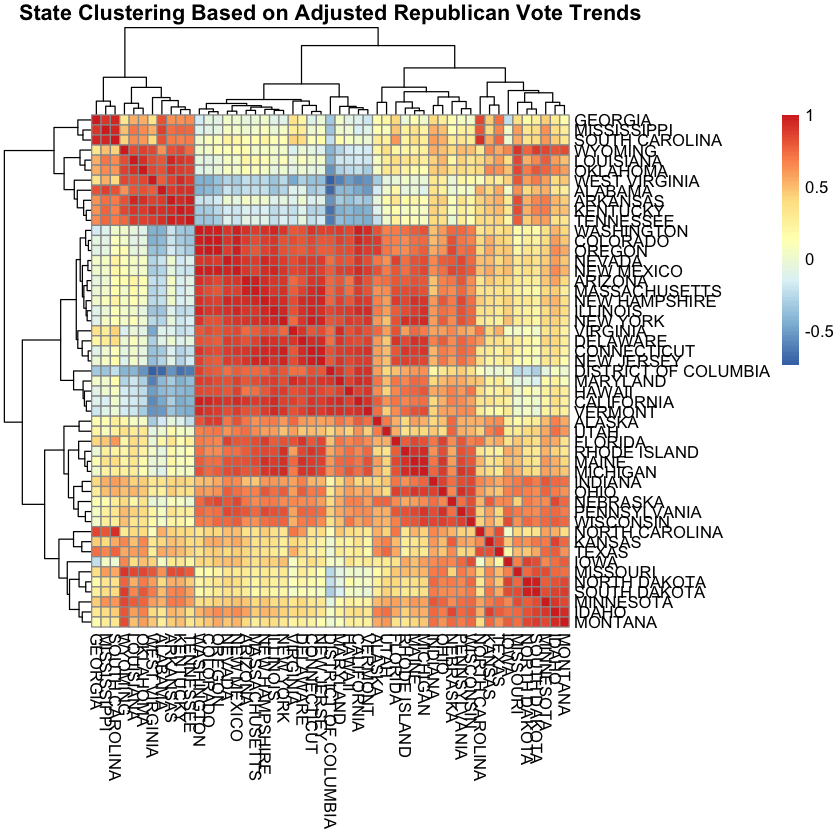

In [9]:
state_wide <- election_results %>%
  select(election_year, state, adjusted_percentage_votes_republican) %>%
  pivot_wider(names_from = election_year, values_from = adjusted_percentage_votes_republican)

state_matrix <- state_wide %>%
  select(-state) %>%
  na.omit() %>%
  as.matrix()

rownames(state_matrix) <- state_wide$state[complete.cases(state_matrix)]

state_corr <- cor(t(state_matrix))

pheatmap(
  state_corr,
  cluster_rows = TRUE,
  cluster_cols = TRUE,
  main = "State Clustering Based on Adjusted Republican Vote Trends"
)



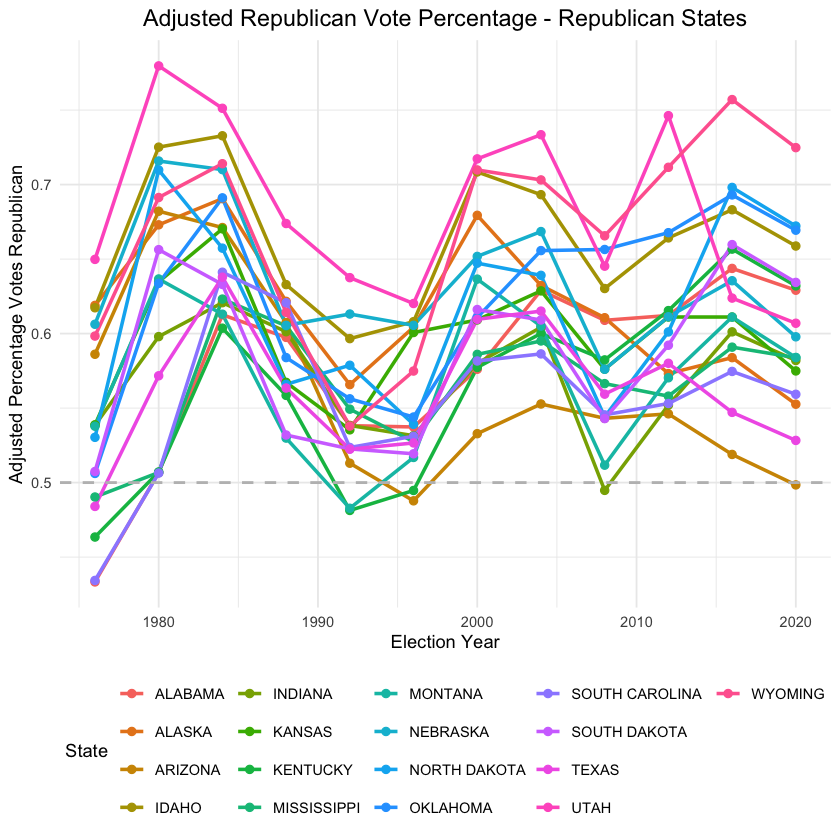

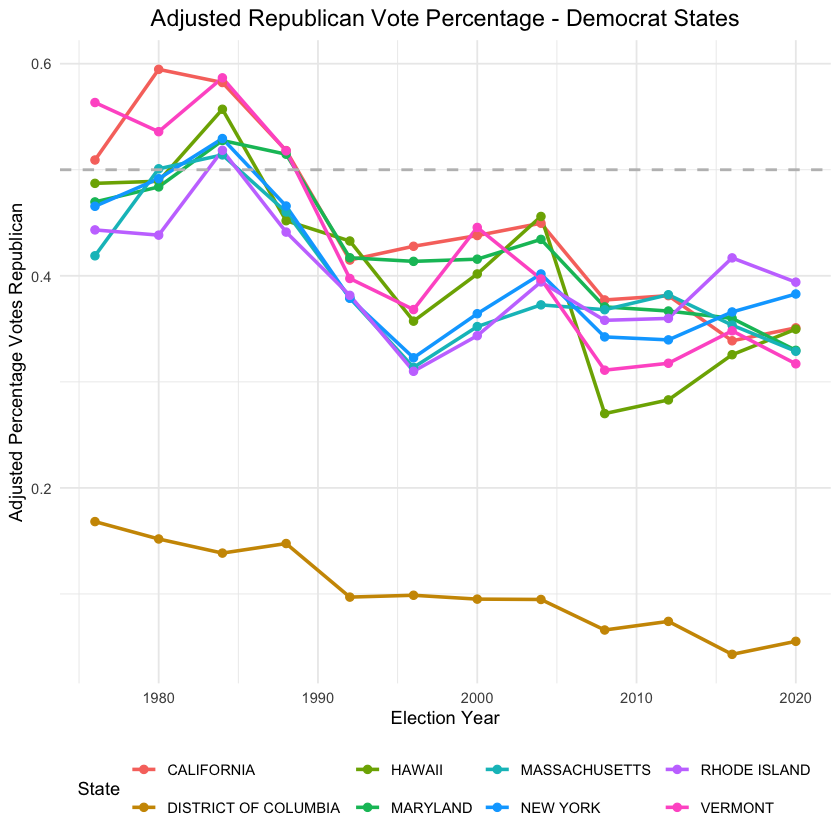

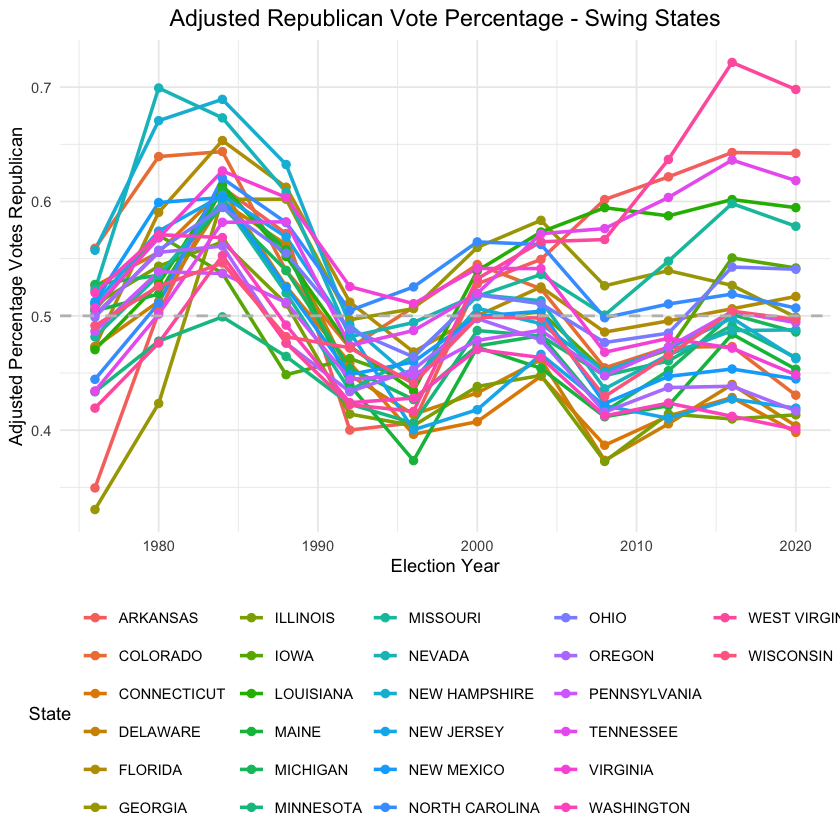

In [10]:
state_categories <- election_results %>%
  group_by(state) %>%
  summarize(
    avg_adjusted_republican = mean(adjusted_percentage_votes_republican, na.rm = TRUE),
    avg_adjusted_democrats = mean(adjusted_percentage_votes_democrats, na.rm = TRUE)
  ) %>%
  mutate(category = case_when(
    avg_adjusted_republican > 0.55 ~ "Republican",
    avg_adjusted_democrats > 0.55 ~ "Democrat",
    TRUE ~ "Swing"
  ))

election_results <- election_results %>%
  left_join(state_categories %>% select(state, category), by = "state")

categories <- c("Republican", "Democrat", "Swing")

for (category in categories) {
  plot <- election_results %>%
    filter(category == !!category) %>%
    ggplot(aes(x = election_year, y = adjusted_percentage_votes_republican, color = state, group = state)) +
    geom_line(size = 1) +
    geom_point(size = 2) +
    geom_hline(yintercept = 0.5, linetype = "dashed", color = "gray", size = 0.8) +
    labs(
      title = paste("Adjusted Republican Vote Percentage -", category, "States"),
      x = "Election Year",
      y = "Adjusted Percentage Votes Republican",
      color = "State"
    ) +
    theme_minimal() +
    theme(
      plot.title = element_text(hjust = 0.5, size = 14),
      legend.position = "bottom"
    )
  
  print(plot)
}

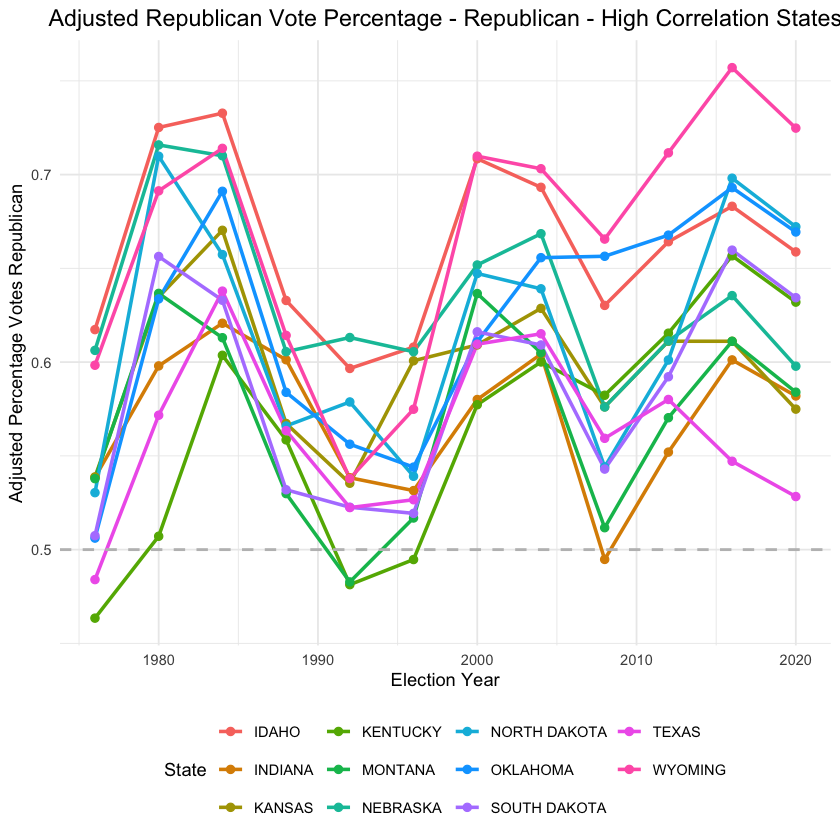

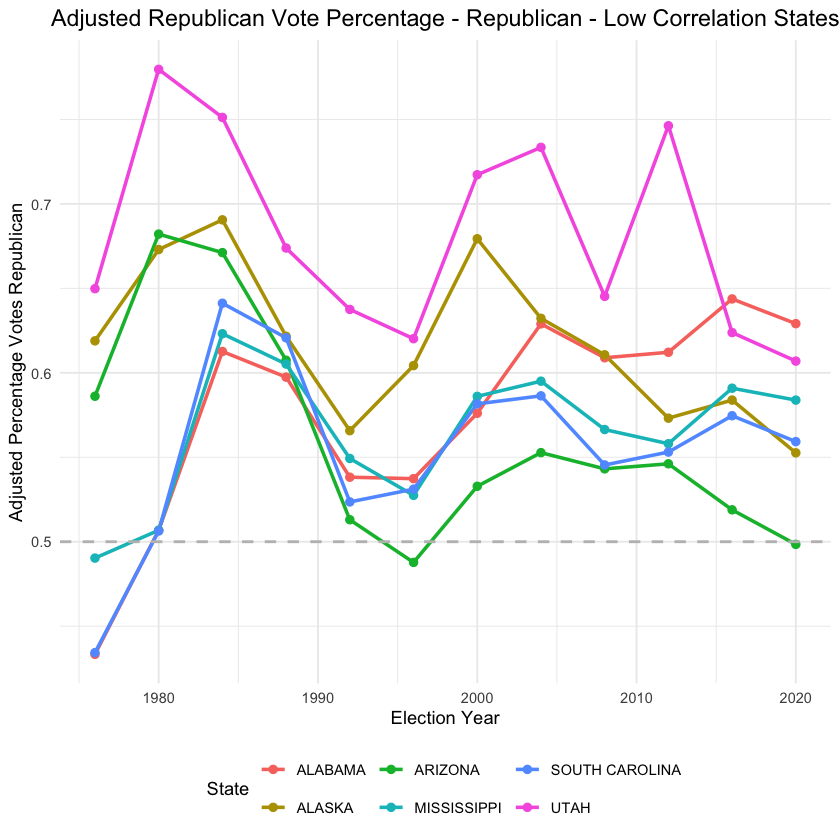

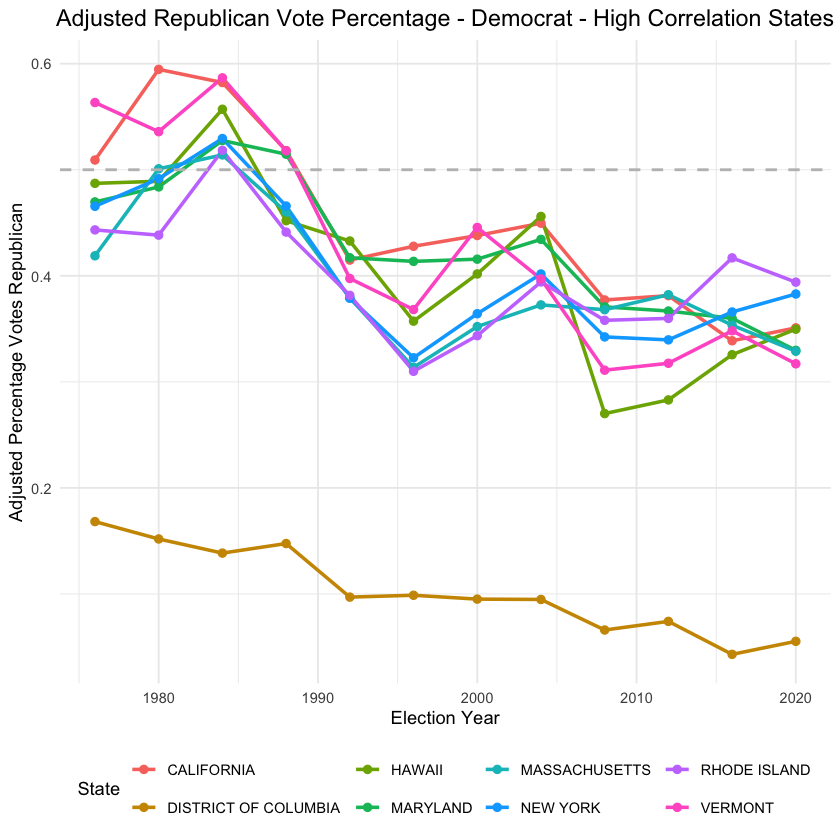

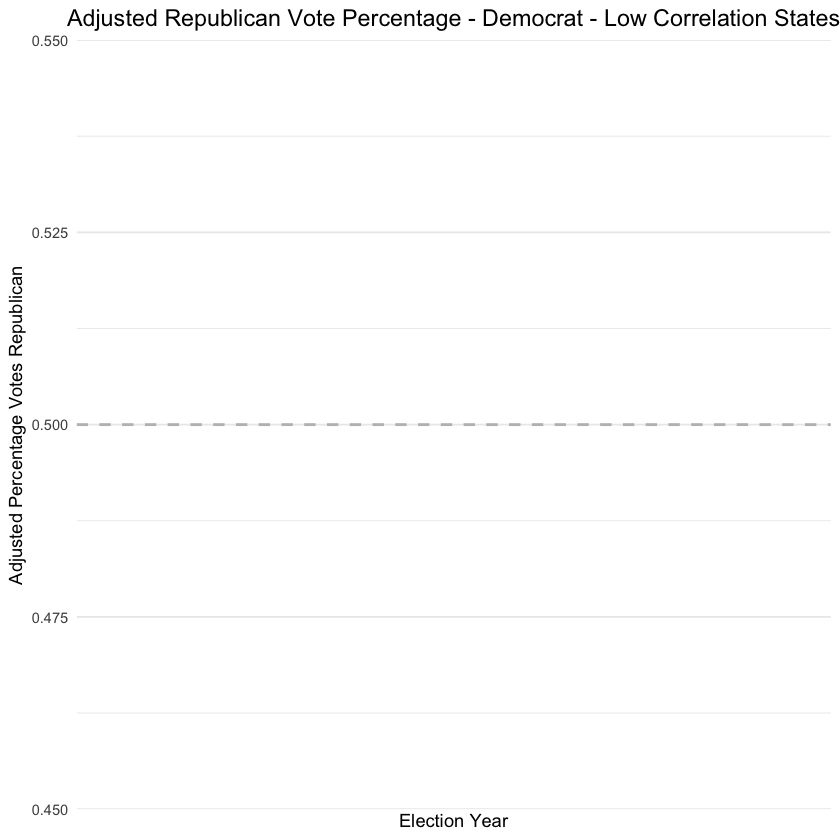

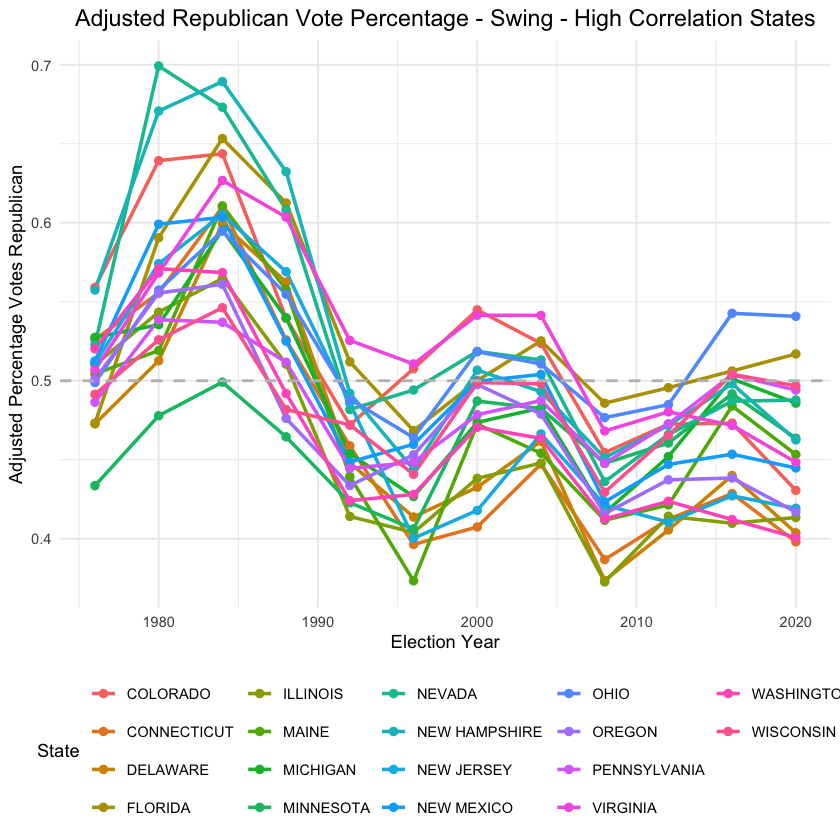

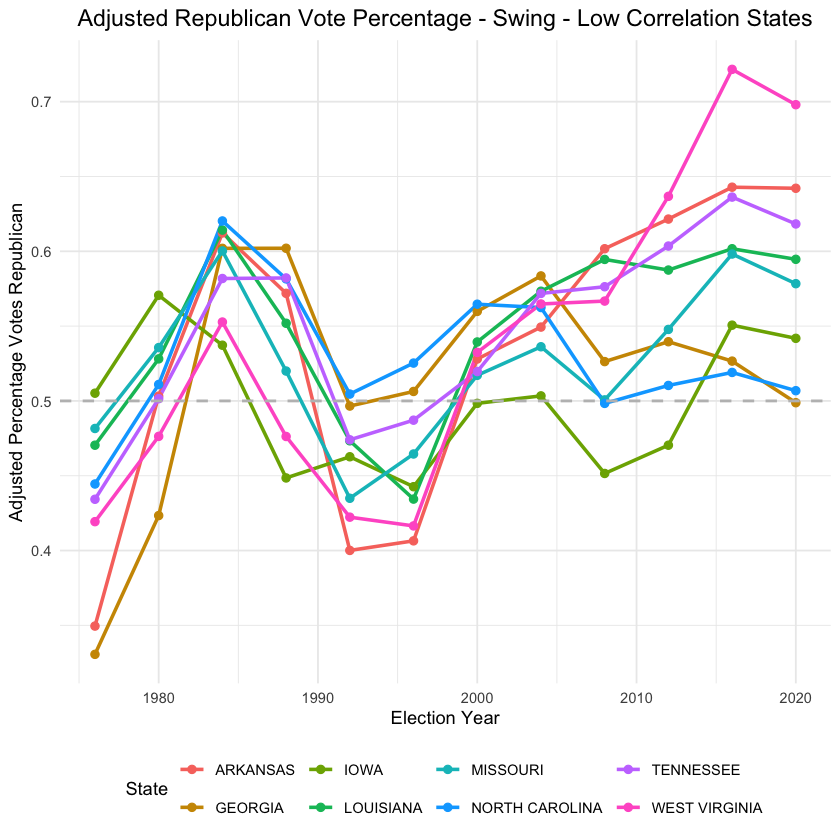

In [11]:
classify_states_by_correlation <- function(data, threshold = 0.7) {
  subgroup_avg <- data %>%
    group_by(election_year) %>%
    summarize(avg_adjusted_republican = mean(adjusted_percentage_votes_republican, na.rm = TRUE))
  
  correlations <- data %>%
    group_by(state) %>%
    summarize(correlation = cor(
      adjusted_percentage_votes_republican,
      subgroup_avg$avg_adjusted_republican[match(election_year, subgroup_avg$election_year)],
      use = "complete.obs"
    )) %>%
    mutate(correlation_group = ifelse(correlation >= threshold, "High Correlation", "Low Correlation"))
  
  data <- data %>%
    left_join(correlations %>% select(state, correlation_group), by = "state")
  
  return(data)
}

categories <- c("Republican", "Democrat", "Swing")
threshold <- 0.7 

for (category in categories) {
  subgroup_data <- election_results %>%
    filter(category == !!category)
  
  classified_data <- classify_states_by_correlation(subgroup_data, threshold)
  
  for (correlation_group in c("High Correlation", "Low Correlation")) {
    plot <- classified_data %>%
      filter(correlation_group == !!correlation_group) %>%
      ggplot(aes(x = election_year, y = adjusted_percentage_votes_republican, color = state, group = state)) +
      geom_line(size = 1) +
      geom_point(size = 2) +
      geom_hline(yintercept = 0.5, linetype = "dashed", color = "gray", size = 0.8) +
      labs(
        title = paste(
          "Adjusted Republican Vote Percentage -", 
          category, "-", 
          correlation_group, "States"
        ),
        x = "Election Year",
        y = "Adjusted Percentage Votes Republican",
        color = "State"
      ) +
      theme_minimal() +
      theme(
        plot.title = element_text(hjust = 0.5, size = 14),
        legend.position = "bottom"
      )
    
    print(plot)
  }
}